**Import libraries**

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [421]:
import warnings
warnings.filterwarnings('ignore')

**Import dataset**

In [422]:
df=pd.read_csv('/car_evaluation.txt',header=None,sep=',',names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [423]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [425]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [426]:
col=['buying','maint','doors','persons','lug_boot','safety','class']

In [427]:
for i in col:
  print(df[i].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


**Missing data**

In [428]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [429]:
x=df.iloc[:,:6]

In [430]:
y=df.iloc[:,6:]

**Splitting dataset**

In [431]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [432]:
x_train.shape,x_test.shape

((1382, 6), (346, 6))

**Encoding categorical variables**

In [433]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


In [435]:
import category_encoders as ce

In [436]:

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

**Random forest Classification**

In [437]:
from sklearn.ensemble import RandomForestClassifier

In [438]:
rfc=RandomForestClassifier(n_estimators=100)

In [439]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [440]:
y_pred=rfc.predict(x_test)

In [441]:
from sklearn.metrics import accuracy_score

In [442]:
accuracy_score(y_test,y_pred)

0.9595375722543352

In [443]:
y_pred

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'good', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'good', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'vgood',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'acc', 'vgood', 'acc', 'unacc', 'acc', 'vgood', 'acc', 'unacc',
       'good', 'unacc', 'unacc', 'unacc', 'good', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'good', 'good',
  

In [444]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 72,   6,   5,   0],
       [  0,  10,   0,   1],
       [  0,   0, 235,   0],
       [  2,   0,   0,  15]])

**Accuracy of Random forest is 95%**

**Visualiztion**

In [445]:
feature_scores = pd.Series(rfc.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

safety      0.286255
persons     0.230750
buying      0.180251
maint       0.142732
lug_boot    0.094840
doors       0.065171
dtype: float64

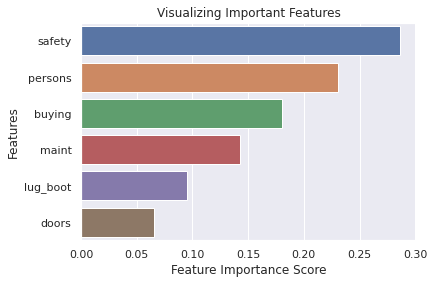

In [446]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()